In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-v0_8-whitegrid')

Data loaded from pokemon_go.csv. Shape: (75, 27)


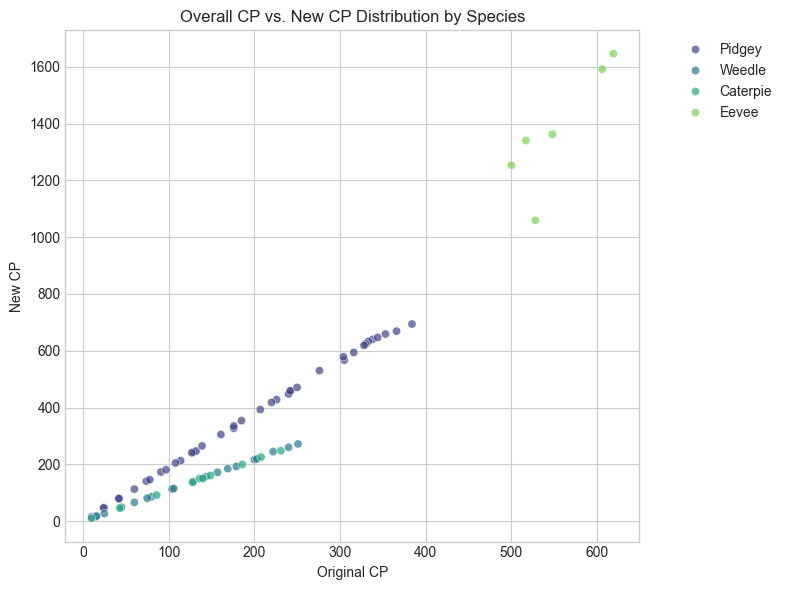

In [13]:
file_path = 'pokemon_go.csv'
data = pd.read_csv(file_path)
print(f"Data loaded from {file_path}. Shape: {data.shape}")
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='cp', y='cp_new', hue='species', alpha=0.7, palette='viridis')
plt.title('Overall CP vs. New CP Distribution by Species')
plt.xlabel('Original CP')
plt.ylabel('New CP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Unique species found: ['Pidgey' 'Weedle' 'Caterpie' 'Eevee']


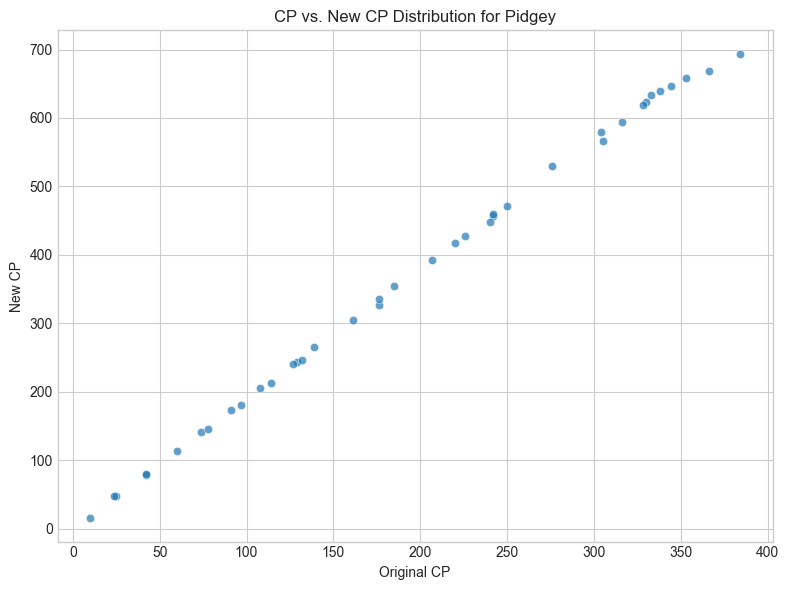

In [17]:
species_list = data['species'].unique()
print(f"Unique species found: {species_list}")
# Unique species found: ['Pidgey' 'Weedle' 'Caterpie' 'Eevee']

species_to_analyze = 'Pidgey'
pidgey_data = data[data['species'] == species_to_analyze].copy()
plt.figure(figsize=(8,6))
sns.scatterplot(data=pidgey_data, x='cp', y='cp_new', alpha=0.7)
plt.title(f'CP vs. New CP Distribution for {species_to_analyze}')
plt.xlabel('Original CP')
plt.ylabel('New CP')
plt.tight_layout()
plt.show()


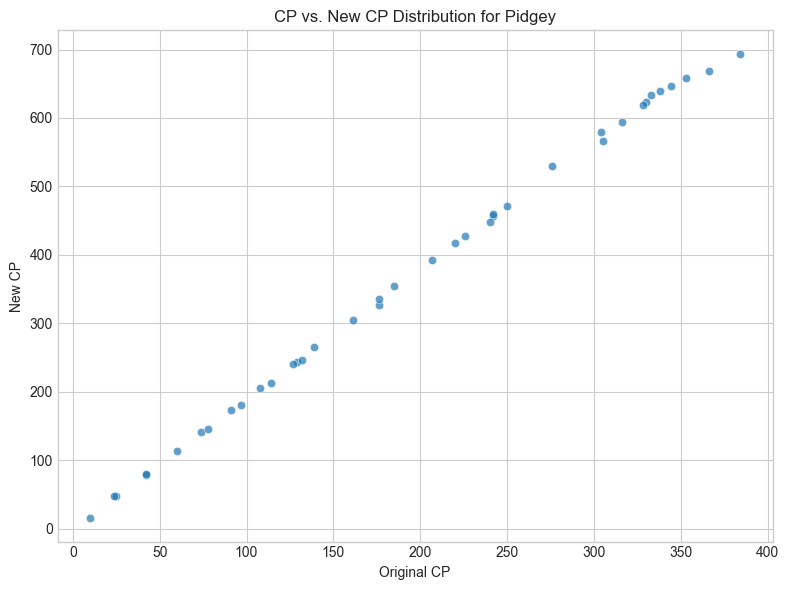

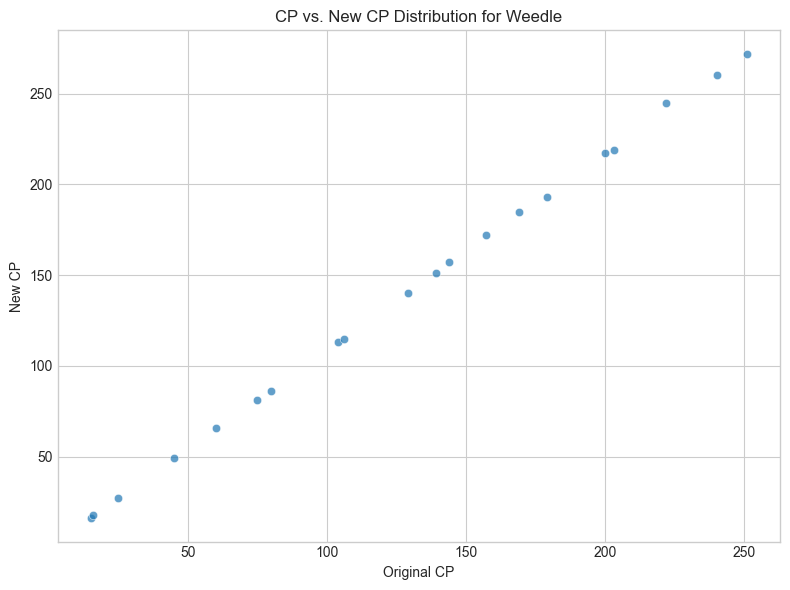

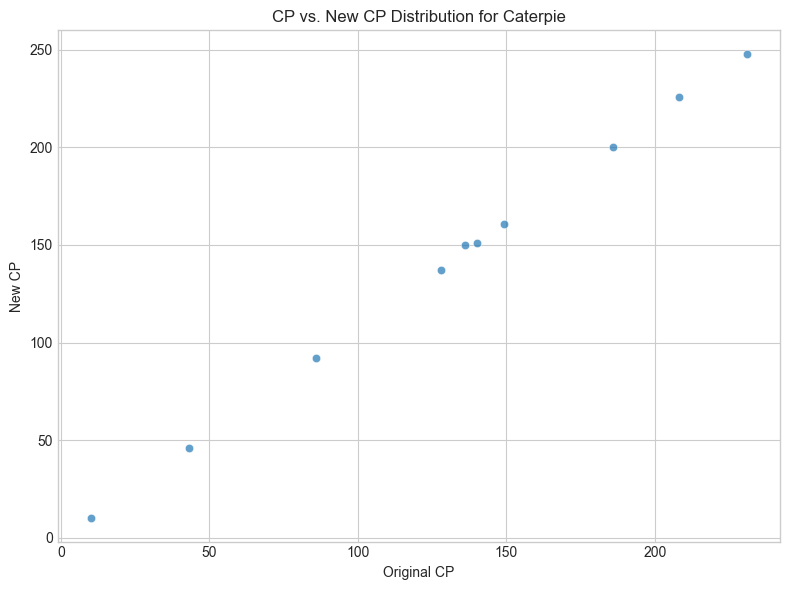

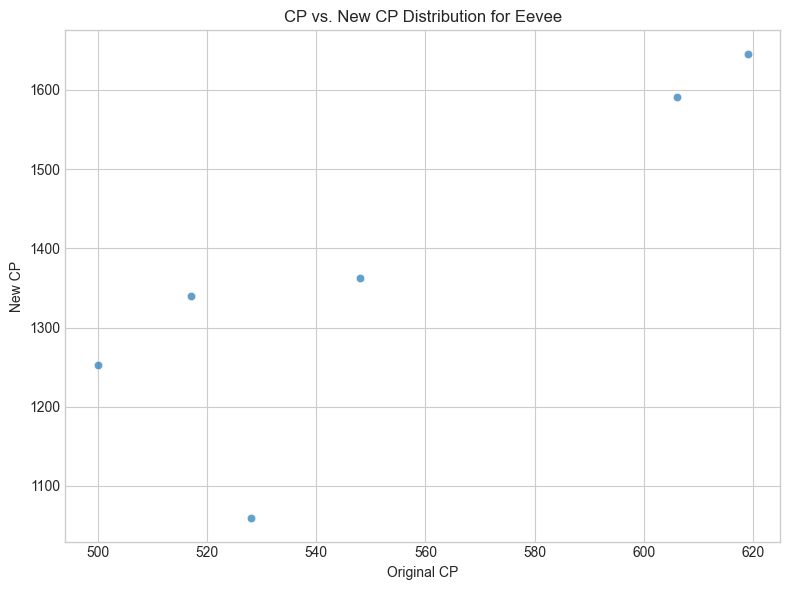

In [18]:
for species in species_list:
    species_data = data[data['species'] == species].copy()
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=species_data, x='cp', y='cp_new', alpha=0.7)
    plt.title(f'CP vs. New CP Distribution for {species}')
    plt.xlabel('Original CP')
    plt.ylabel('New CP')
    plt.tight_layout()
    plt.show()

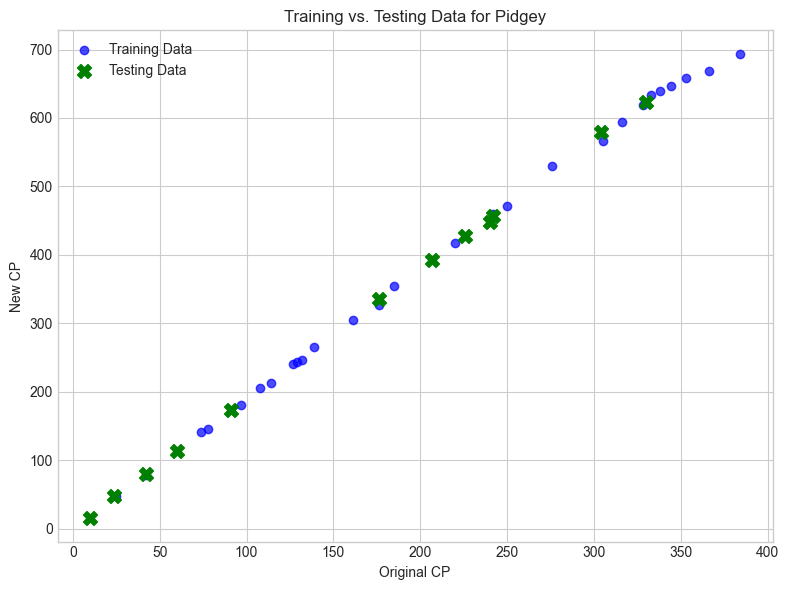

In [44]:
X = pidgey_data[['cp']]
y = pidgey_data[['cp_new']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Training Data')
plt.scatter(X_test, y_test, color='green', marker='X', s=100, label='Testing Data')
plt.title(f'Training vs. Testing Data for {species_to_analyze}')
plt.xlabel('Original CP')
plt.ylabel('New CP')
plt.legend()
plt.tight_layout()
plt.show()

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


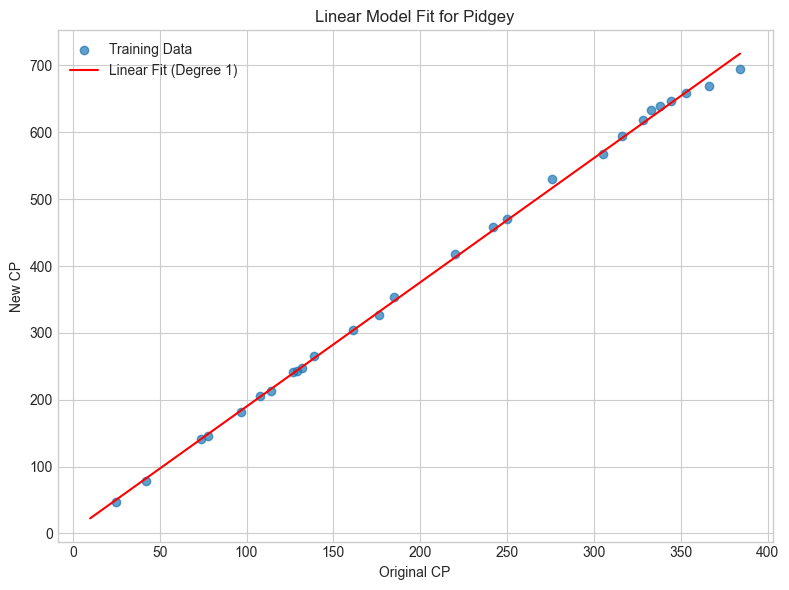

In [45]:
model_deg1 = LinearRegression()
model_deg1.fit(X_train, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, alpha=0.7, label='Training Data')
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_deg1 = model_deg1.predict(x_range)
plt.plot(x_range, y_pred_deg1, color='red', label='Linear Fit (Degree 1)')
plt.title('Linear Model Fit for Pidgey')
plt.xlabel('Original CP')
plt.ylabel('New CP')
plt.legend()
plt.tight_layout()
plt.show()


/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Quadratic Fit for Pidgey')

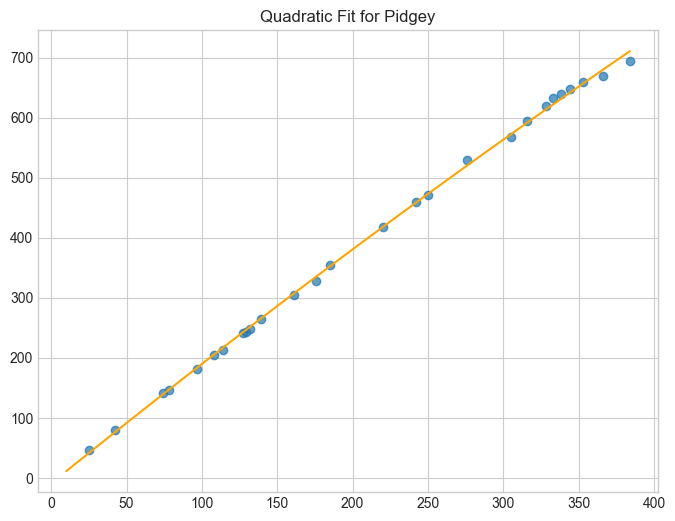

In [46]:
poly_deg2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_deg2 = poly_deg2.fit_transform(X_train)

model_deg2 = LinearRegression()
model_deg2.fit(X_train_deg2, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, alpha=0.7, label='Training Data')
x_range_deg2 = poly_deg2.transform(x_range)
y_pred_deg2 = model_deg2.predict(x_range_deg2)
plt.plot(x_range, y_pred_deg2, color='orange', label='Quadratic Fit (Degree 2)')
plt.title('Quadratic Fit for Pidgey')


/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Cubic Fit for Pidgey')

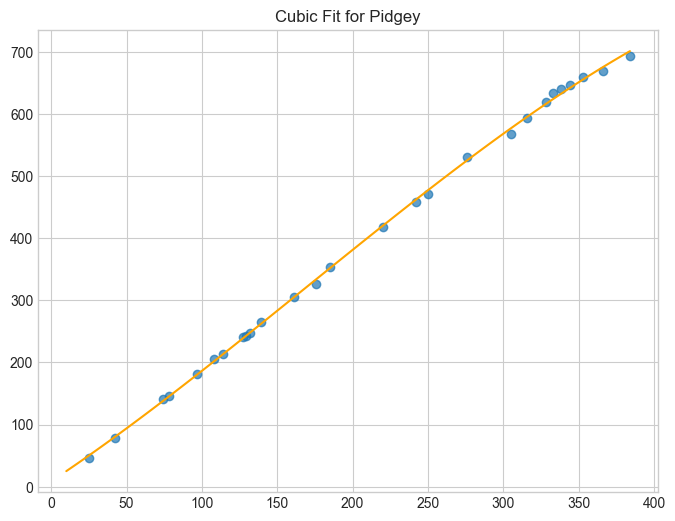

In [47]:
poly_deg3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_deg3 = poly_deg3.fit_transform(X_train)

model_deg3 = LinearRegression()
model_deg3.fit(X_train_deg3, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, alpha=0.7, label='Training Data')
x_range_deg3 = poly_deg3.transform(x_range)
y_pred_deg3 = model_deg3.predict(x_range_deg3)
plt.plot(x_range, y_pred_deg3, color='orange', label='Cubic Fit (Degree 3)')
plt.title('Cubic Fit for Pidgey')

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Quartic Fit for Pidgey')

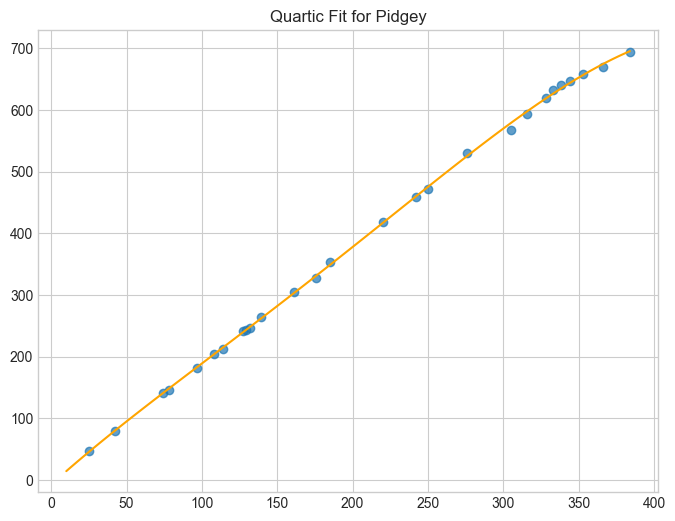

In [48]:
poly_deg4 = PolynomialFeatures(degree=4, include_bias=False)
X_train_deg4 = poly_deg4.fit_transform(X_train)

model_deg4 = LinearRegression()
model_deg4.fit(X_train_deg4, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, alpha=0.7, label='Training Data')
x_range_deg4 = poly_deg4.transform(x_range)
y_pred_deg4 = model_deg4.predict(x_range_deg4)
plt.plot(x_range, y_pred_deg4, color='orange', label='Quartic Fit (Degree 4)')
plt.title('Quartic Fit for Pidgey')

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Quintic Fit for Pidgey')

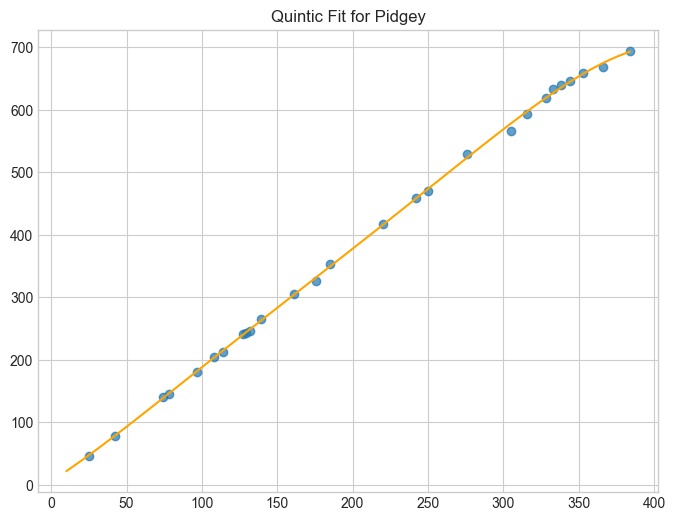

In [49]:
poly_deg5 = PolynomialFeatures(degree=5, include_bias=False)
X_train_deg5 = poly_deg5.fit_transform(X_train)

model_deg5 = LinearRegression()
model_deg5.fit(X_train_deg5, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, alpha=0.7, label='Training Data')
x_range_deg5 = poly_deg5.transform(x_range)
y_pred_deg5 = model_deg5.predict(x_range_deg5)
plt.plot(x_range, y_pred_deg5, color='orange', label='Quintic Fit (Degree 5)')
plt.title('Quintic Fit for Pidgey')

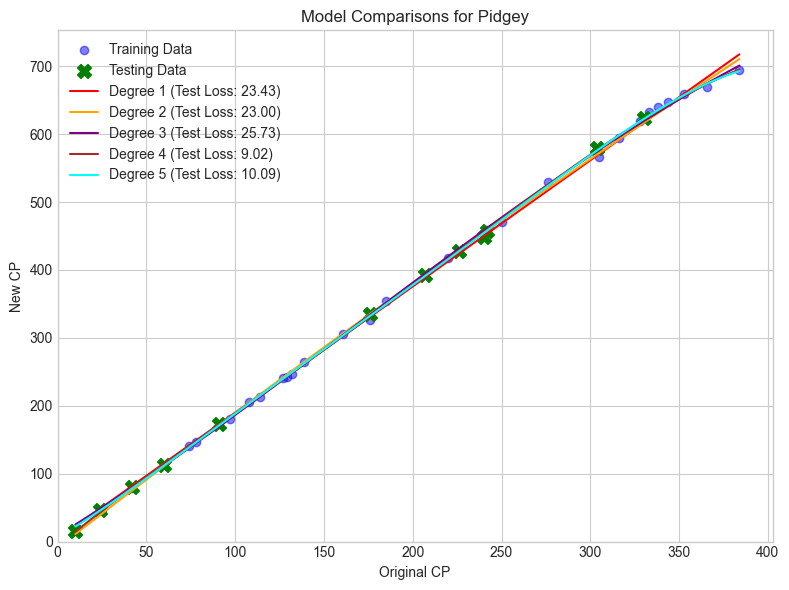

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, color='green', marker='X', s=100, label='Testing Data')

y_test_pred_deg1 = model_deg1.predict(X_test)
loss_deg1 = mean_squared_error(y_test, y_test_pred_deg1)
plt.plot(x_range, y_pred_deg1, color='red', label=f'Degree 1 (Test Loss: {loss_deg1:.2f})')

X_test_deg2 = poly_deg2.transform(X_test)
y_test_pred_deg2 = model_deg2.predict(X_test_deg2)
loss_deg2 = mean_squared_error(y_test, y_test_pred_deg2)
plt.plot(x_range, y_pred_deg2, color='orange', label=f'Degree 2 (Test Loss: {loss_deg2:.2f})')

X_test_deg3 = poly_deg3.transform(X_test)
y_test_pred_deg3 = model_deg3.predict(X_test_deg3)
loss_deg3 = mean_squared_error(y_test, y_test_pred_deg3)
plt.plot(x_range, y_pred_deg3, color='purple', label=f'Degree 3 (Test Loss: {loss_deg3:.2f})')

X_test_deg4 = poly_deg4.transform(X_test)
y_test_pred_deg4 = model_deg4.predict(X_test_deg4)
loss_deg4 = mean_squared_error(y_test, y_test_pred_deg4)
plt.plot(x_range, y_pred_deg4, color='brown', label=f'Degree 4 (Test Loss: {loss_deg4:.2f})')

X_test_deg5 = poly_deg5.transform(X_test)
y_test_pred_deg5 = model_deg5.predict(X_test_deg5)
loss_deg5 = mean_squared_error(y_test, y_test_pred_deg5)
plt.plot(x_range, y_pred_deg5, color='cyan', label=f'Degree 5 (Test Loss: {loss_deg5:.2f})')

plt.title(f'Model Comparisons for {species_to_analyze}')
plt.xlabel('Original CP')
plt.ylabel('New CP')
plt.legend()
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.tight_layout()
plt.show()

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserW

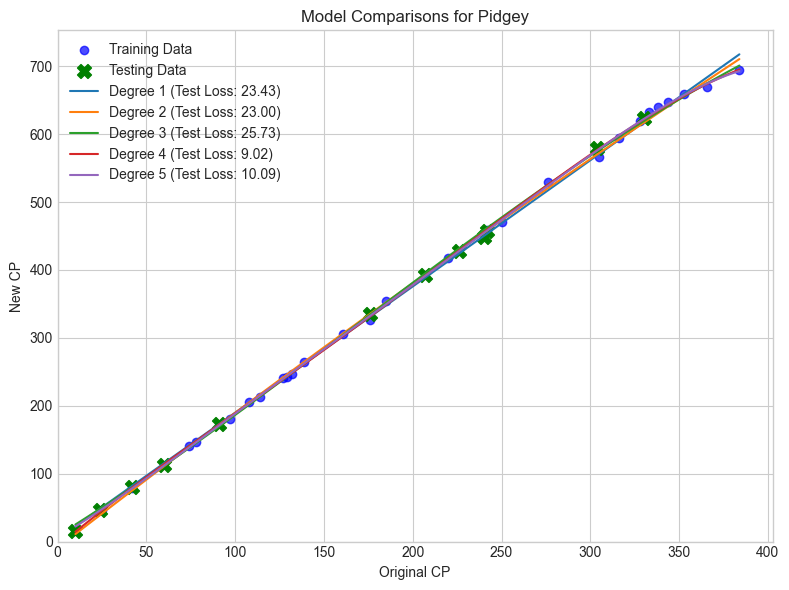

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserW

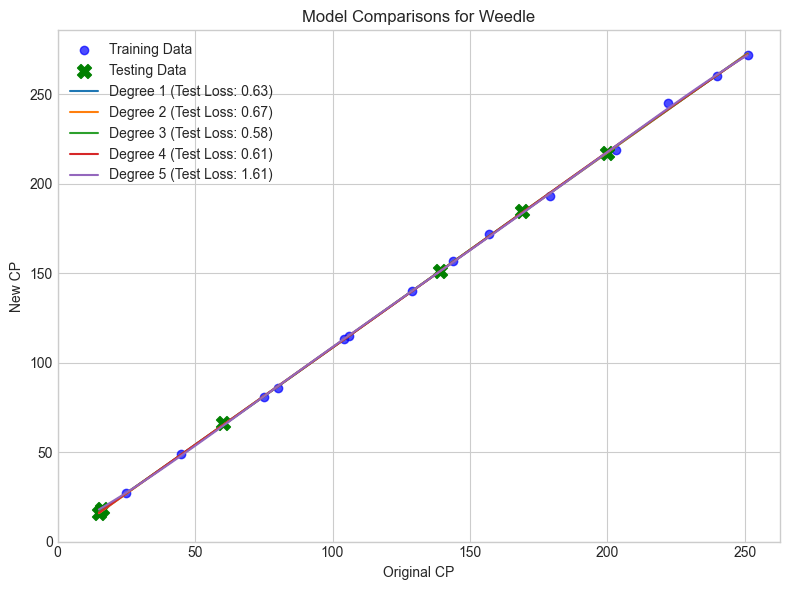

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserW

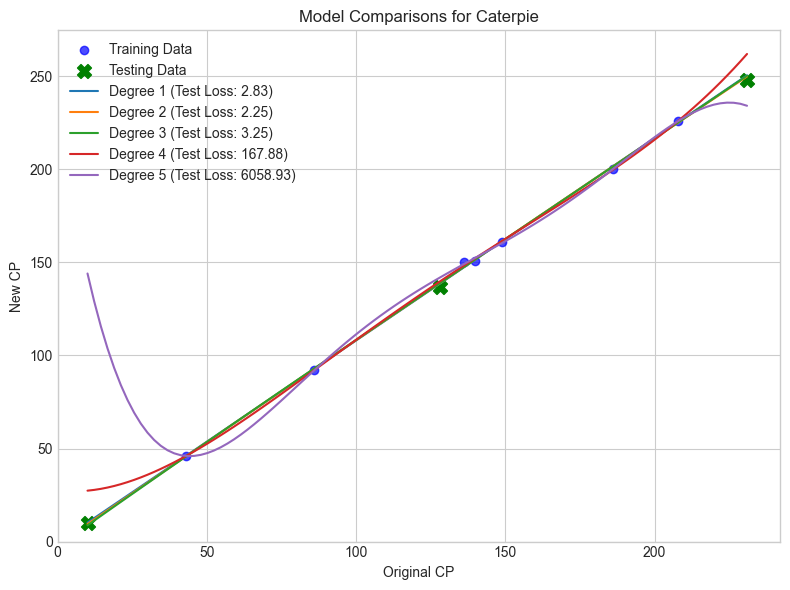

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserW

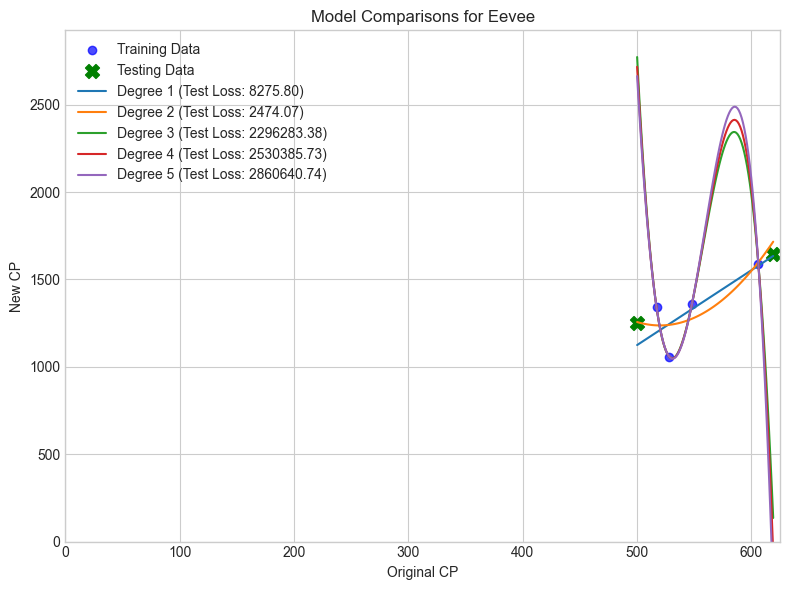

In [52]:
for species in species_list:
    species_data = data[data['species'] == species].copy()
    x = species_data[['cp']]
    y = species_data[['cp_new']]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    plt.figure(figsize=(8,6))
    plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Training Data')
    plt.scatter(X_test, y_test, color='green', marker='X', s=100, label='Testing Data')

    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

    for degree in [1, 2, 3, 4, 5]:
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_test_pred = model.predict(X_test_poly)
        test_loss = mean_squared_error(y_test, y_test_pred)
        x_range_poly = poly_features.transform(x_range)
        y_range_pred = model.predict(x_range_poly)
        plt.plot(x_range, y_range_pred, label=f'Degree {degree} (Test Loss: {test_loss:.2f})')
    
    plt.title(f'Model Comparisons for {species}')
    plt.xlabel('Original CP')
    plt.ylabel('New CP')
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlim(left=0)
    plt.tight_layout()
    plt.show()